In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_egg = pd.read_csv("Egg_Production_2007_2012.csv")
data_egg.head()
data_milk = pd.read_csv("Milk_Production_2007_2012.csv")
data_milk.head()

,States/Uts,2007-08,2008-09,2009-10,2010-11,2011-12
0,Andhra Pradesh,8925,9570,10429,11203,12088
1,Arunachal Pradesh,32,24,26,28,22
2,Assam,752,753,756,790,796
3,Bihar,5783,5934,6124,6517,6643
4,Chhattisgarh,866,908,956,1029,1119


In [3]:
data_merge = pd.merge(data_egg,data_milk,on ='States/Uts')
data_merge.head()
newColumns = [("","States/Uts"), ("Eggs","2007-08"),  ("Eggs","2008-09"),  ("Eggs","2009-10"),  ("Eggs","2010-11"),  ("Eggs","2011-12"),  ("Milk","2007-08"), ("Milk","2008-09"), ("Milk","2009-10"), ("Milk","2010-11"), ("Milk","2011-12")]
data_merge.columns = pd.MultiIndex.from_tuples(newColumns)
data_merge.head()

Eggs                                    Milk          \
          States/Uts 2007-08 2008-09 2009-10 2010-11 2011-12 2007-08 2008-09   
0     Andhra Pradesh  175884  183446  193958  201277  212103    8925    9570   
1  Arunachal Pradesh     394     361     380     407     419      32      24   
2              Assam    4910    4659    4671    4707    4705     752     753   
3              Bihar   10707   10740   11002    7446    7552    5783    5934   
4       Chhattisgarh    9184    9738   10520   12454   12984     866     908   

                           
  2009-10 2010-11 2011-12  
0   10429   11203   12088  
1      26      28      22  
2     756     790     796  
3    6124    6517    6643  
4     956    1029    1119

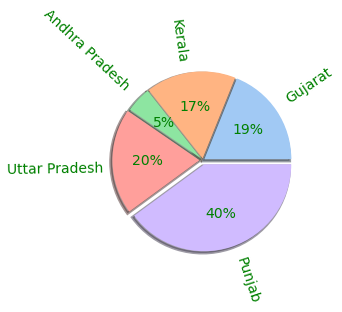

In [6]:
data_states = ["Gujarat", "Kerala", "Andhra Pradesh", "Uttar Pradesh", "Punjab"]
data = data_milk[data_milk["States/Uts"].isin(data_states)]["2007-08"]
data_color = sns.color_palette('pastel')[0:5]
label=data_states
explode=[0.02,0.02,0.02,0.04,0.05]
plt.pie(data, labels=label,colors = data_color,autopct = '%0.0f%%',explode = explode,shadow = 'True',textprops = {'color': 'Green','fontsize':14},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
plt.show()

(0.0, 1.0, 0.0, 1.0)

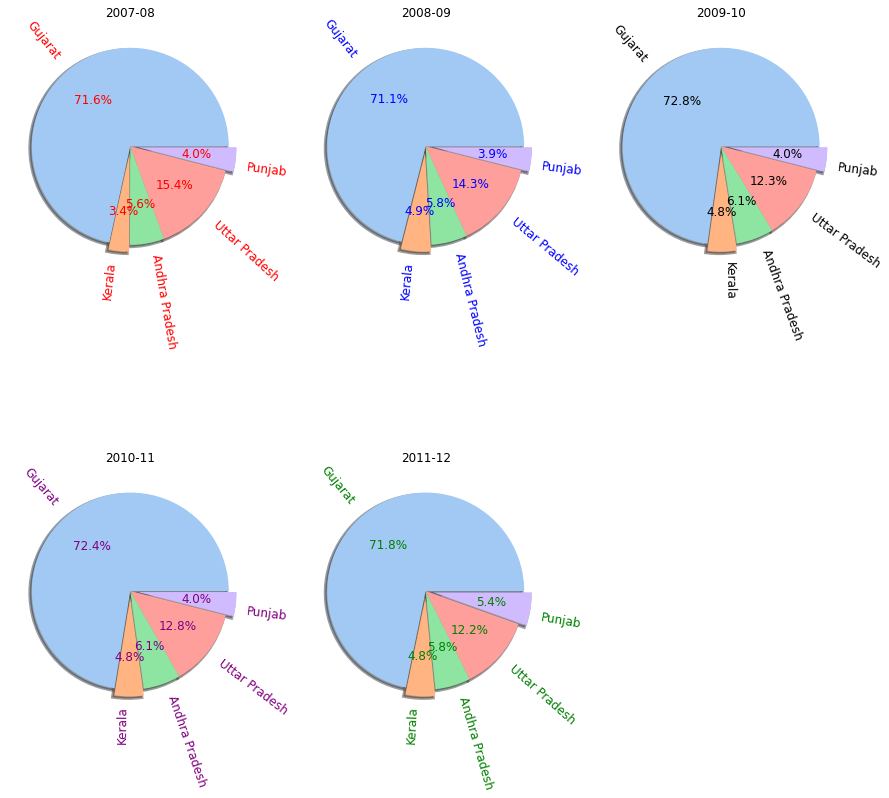

In [13]:
data_states = ["Gujarat", "Kerala", "Andhra Pradesh", "Uttar Pradesh", "Punjab"]

data1_egg = data_egg[data_egg["States/Uts"].isin(data_states)]["2007-08 (In lakh nos.)"]
data2_egg = data_egg[data_egg["States/Uts"].isin(data_states)]["2008-09 (In lakh nos.)"]
data3_egg = data_egg[data_egg["States/Uts"].isin(data_states)]["2009-10 (In lakh nos.)"]
data4_egg = data_egg[data_egg["States/Uts"].isin(data_states)]["2010-11 (In lakh nos.)"]
data5_egg = data_egg[data_egg["States/Uts"].isin(data_states)]["2011-12 (In lakh nos.)"]
data_color = sns.color_palette('pastel')[0:5]
explode=[0,0.07,0,0,0.08]
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

axs[0, 0].pie(data1_egg, labels=data_states,colors = data_color, autopct="%.1f%%",explode = explode,shadow = 'True',textprops = {'color': 'Red','fontsize':12},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
axs[0, 0].set_title("2007-08")
axs[0, 1].pie(data2_egg, labels=data_states,colors = data_color, autopct="%.1f%%",explode = explode,shadow = 'True',textprops = {'color': 'Blue','fontsize':12},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
axs[0, 1].set_title("2008-09")
axs[0, 2].pie(data3_egg, labels=data_states,colors = data_color, autopct="%.1f%%",explode = explode,shadow = 'True',textprops = {'color': 'Black','fontsize':12},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
axs[0, 2].set_title("2009-10")
axs[1, 0].pie(data4_egg, labels=data_states,colors = data_color, autopct="%.1f%%",explode = explode,shadow = 'True',textprops = {'color': 'Purple','fontsize':12},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
axs[1, 0].set_title("2010-11")
axs[1, 1].pie(data5_egg, labels=data_states,colors = data_color, autopct="%.1f%%",explode = explode,shadow = 'True',textprops = {'color': 'Green','fontsize':12},wedgeprops = {'linewidth': 3},rotatelabels = 'true')
axs[1, 1].set_title("2011-12")
axs[1, 2].axis('off')

In [15]:
data = data_egg[data_egg["States/Uts"].isin(data_states)]
data.index = data["States/Uts"]
data.drop(columns=["States/Uts"], inplace=True)

data.columns = ["2007-08", "2008-09", "2009-10", "2010-11", "2011-12"]

data

c:\users\rushi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,2007-08,2008-09,2009-10,2010-11,2011-12
States/Uts,,,,,
Andhra Pradesh,175884,183446,193958,201277,212103
Gujarat,8256,12675,12762,13269,14269
Kerala,13831,15095,16330,16856,17049
Punjab,37914,36790,32828,35449,36030
Uttar Pradesh,9814,10140,10596,10991,16075


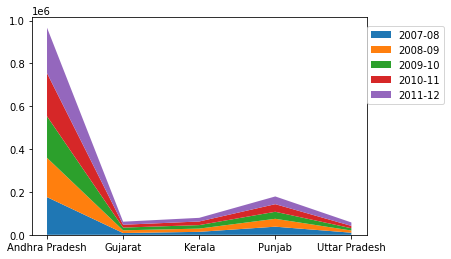

In [16]:
plt.stackplot(data.index, data["2007-08"], data["2008-09"], data["2009-10"], data["2010-11"], data["2011-12"], labels=data.columns)
plt.legend(loc=(1.0, 0.6))

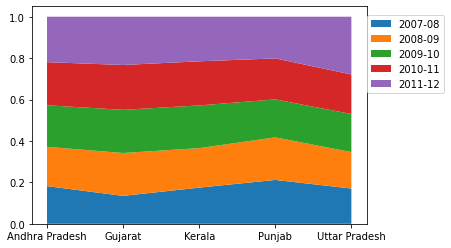

In [17]:

norm = data.div(data.sum(axis=1), axis=0)
norm1 = data.div(data.mean(axis=1), axis=0)

plt.stackplot(norm.index, norm["2007-08"], norm["2008-09"], norm["2009-10"], norm["2010-11"], norm["2011-12"], labels=norm.columns)
plt.legend(loc=(1.0, 0.6))